# BE 485/585
## DATE
## Your First and Last and you can add your photo if you wish
In this exercise you will learn to:
* a) read BSQ file
* b) display images
    * Single band gray scale
    * Single band other colors
    * True color composite
    * False color composite

In [1]:
# You should by now be familiar with this 

# load necessary library modules 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

#Here we check to see if our library is where it could be accessed
if "../Library/" not in sys.path:
    sys.path.append("../Library/")
import viplab_lib as vip

# Need to change the directory path  
sys.path.append(r"../Lab_4")

## Load a custom module that reads BSQ data 

In [2]:
# This is a costum module/function that reads BSQ Data
def BSQ_band_read(filename,bandindex,nrows,ncols,datatype=np.int16):
    
    #do image computations
    bytesize=np.dtype(datatype).itemsize
    pixelsperband=nrows*ncols
    bandsize=pixelsperband*bytesize
    
    if type(bandindex) in (list, np.ndarray):
        isList=True
    else:
      isList=False  
      if (bandindex<0):
          isList=True
          bandindex=np.abs(bandindex)  
          bandindex=np.linspace(0,bandindex-1,num=bandindex)
          print(bandindex)
          
    
    #open the file for reading as binary
    f=open(filename,'rb') 
    
    if(isList==True):
      # Several bands will be read
      nbands= len(bandindex)
      print("nbands=",nbands)    
      data=np.zeros((nrows,ncols,nbands),datatype)
      for i in range(0,nbands):
         f.seek(bandsize*i) 
         band=np.fromfile(f,dtype=datatype, count=pixelsperband)
         data[:,:,i]=band.reshape([nrows,ncols])
              
    else:    
       #Read a single band  
       #jum to start of band
       f.seek(bandsize*bandindex)
        
       #read from file as int16, pixels for second band and assign to bandGREEN
       data=np.fromfile(f,dtype=datatype, count=pixelsperband)
       data=data.reshape([nrows,ncols])
    
    # close the file
    f.close()
    return data

# ends bsq reader function    

## Load the data then display images

In [4]:
# figure size is optional but helps create larger/smaller looks

# Load the image - this is not the actual data but a uiqck image thumnail
img_A = mpimg.imread('./Images/GreenValley.jpg')
img_B = mpimg.imread('./Images/HarvardForest.jpg')

#Here is a different way to create canvas and resize 
rcParams['figure.figsize'] = 11 ,8



# Display images with ticks

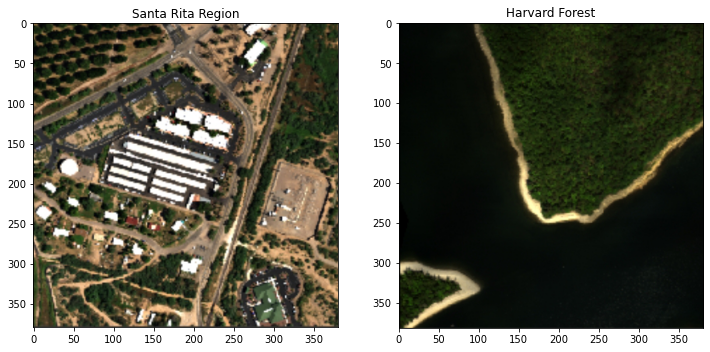

In [12]:
# display images
#Pay attention here, we are creating a canvas with two separate areas to display two images 
# So learn how to create a multi-plot or mulit-image canvas

fig, ax = plt.subplots(1, 2,figsize=(12,12)) # a plot with 2 areas labeled 1 and 2 , indexed below 0 and 1

ax[0].imshow(img_A);
ax[0].title.set_text('Santa Rita Region')

ax[1].imshow(img_B);
ax[1].title.set_text('Harvard Forest')

# Display images without ticks

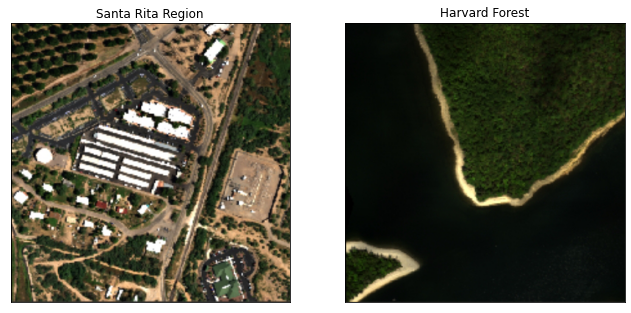

In [15]:
#Here is a different way to create canvas and resize 
rcParams['figure.figsize'] = 11 ,8

# display images
#Pay attention here, we are creating a cnavas with two separate areas to display two images 

fig, ax = plt.subplots(1,2)

ax[0].imshow(img_A);
ax[0].title.set_text('Santa Rita Region')
ax[1].imshow(img_B);
ax[1].title.set_text('Harvard Forest')

# Remove ticks 
ax[0].axes.get_xaxis().set_visible(False) 
ax[0].axes.get_yaxis().set_visible(False) 

ax[1].axes.get_xaxis().set_visible(False) 
ax[1].axes.get_yaxis().set_visible(False) 

# Select and load image data (Green Valley)

In [28]:
# Starts main program
#subset file information - Green Valley Image
filename="../Data/NEON_GreenValley.bsq"

In [29]:
#Define image dimentiosn 
nrows=500
ncols=500
datatype=np.int16

In [30]:
# Read a Red band from file. 
# The number 48 correspond to the band position/number [See Lab. lecture]
DataRed=BSQ_band_read(filename,48,nrows,ncols)

# Extract image dimension
Num_Rows, Num_Col= np.shape(DataRed)
print('Image width:  ', Num_Rows)
print('Image height: ', Num_Col)

Image width:   500
Image height:  500


## Display the image 

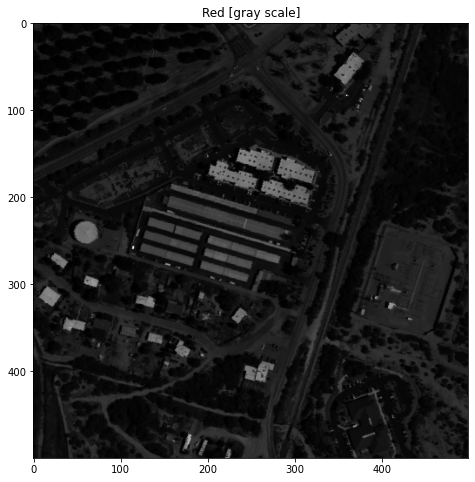

In [31]:
# display band as gray scale
plt.figure()
plt.title('Red [gray scale]')

# you can use the min and max to stretch the image
plt.imshow(DataRed,cmap='gray')

In [33]:
print('Image Max value: ', DataRed.min())
print('Image Min value: ', DataRed.max())


Image Max value:  0
Image Min value:  15307


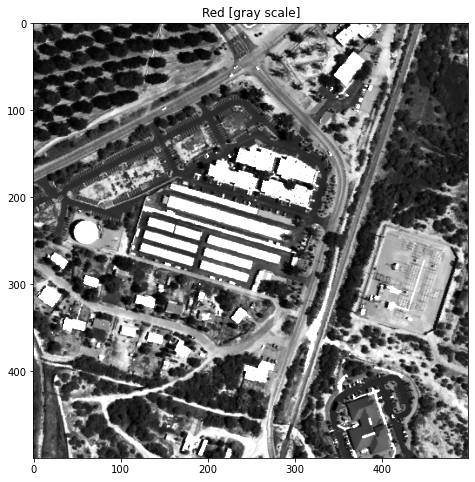

In [37]:
# display band as gray scale
plt.figure()
plt.title('Red [gray scale]')

# you can use the min and max to stretch the image. Compare to the image above 
plt.imshow(DataRed,cmap='gray',vmin=0,vmax=3000)

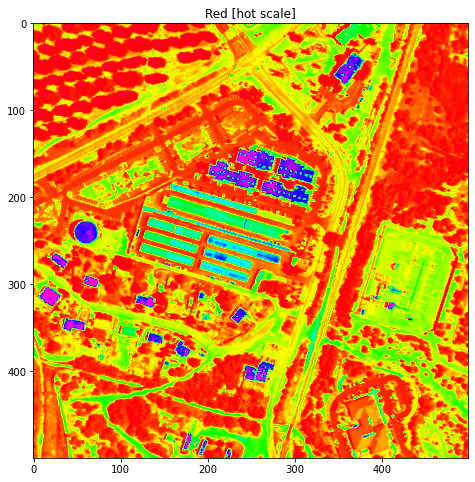

In [44]:
# display band as other color
plt.figure()
plt.title('Red [hot scale]')
plt.imshow(DataRed,cmap='gist_rainbow',vmin=0,vmax=8000)

Creating RGB Image...


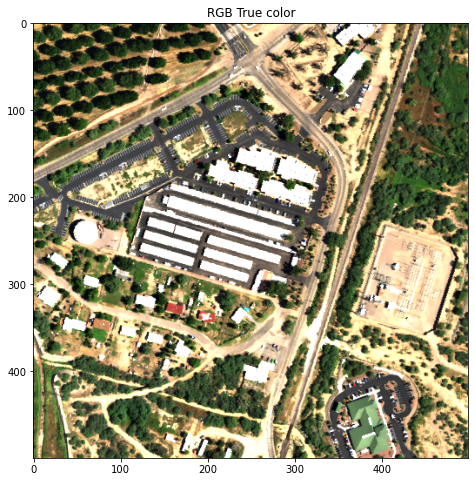

In [46]:
# Read a Green band
DataGreen=BSQ_band_read(filename,34,nrows,ncols)

# Read a Blue band
DataBlue=BSQ_band_read(filename,17,nrows,ncols)

# Combine the Red, Green and Blue data into an RGB model for display
print("Creating RGB Image...")

# The number 6000 corresponnds to the MAX value for the data, so everything will be scaled to MAX from 8000 and up 
RGBImage=vip.Image_getRGB(DataRed,DataGreen,DataBlue,5000)

# Display RGB True color Image
plt.figure()
plt.title('RGB True color')
plt.imshow(RGBImage)

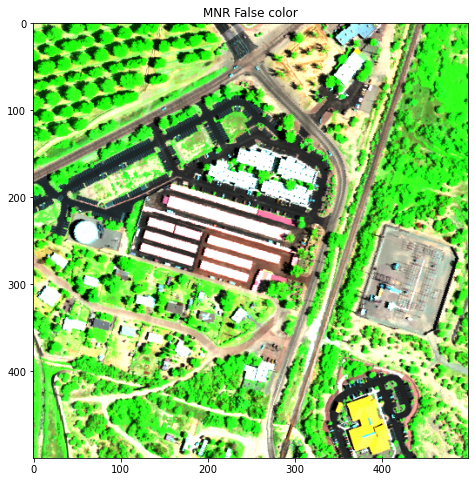

In [47]:
# To remove STARTS
DataMIR=BSQ_band_read(filename,349,nrows,ncols)
DataNIR=BSQ_band_read(filename,95,nrows,ncols)
RGBImage=vip.Image_getRGB(DataMIR,DataNIR,DataRed,8000)
plt.figure()
plt.title('MNR False color')
plt.imshow(RGBImage)
# To remove ENDS

# <font color="red">Homework - To do </font>
## Add/display a color legend next to the images? – Search the web for help
* Try different band combinations and explain what is happening (see  slide in lab instructions)
* Recall how green vegetation reflect in the NIR region, try to assign the NIR to one of the RGB colors (Ex: Red) and see how the image will look like?

In [28]:
# Homework: To do
# Your code here